### 항만 서비스 개선 지표
- 선석 점유율

In [165]:
import warnings
warnings.filterwarnings('ignore')

In [191]:
import pandas as pd
PATH  = '../data/'

df = pd.read_csv(PATH + '울산_사건별_양적하_202122.csv')

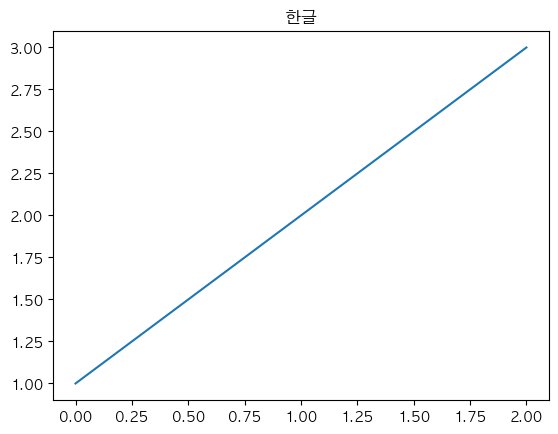

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="AppleGothic") # 라이브러리 불러오기와 함께 한번만 실행

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

In [193]:
df.columns

Index(['호출부호', '입항일시', '출항일시', '사용목적명', '지정일시(FROM)', '지정일시(TO)', '접안_대기시간_분',
       '출항_대기시간', 'Service_Time_Start', 'Service_Time_End', '계선장소_코드',
       '계선장소_숫자', '계선장소명', '선박용도', '항명', '선박명', '입항횟수_연도', '입항횟수_횟수', '구분',
       '입출', '총톤수', 'Service_Time_일', 'Service_Time_시간', 'Service_Time_분',
       '대기율', '재화중량톤수', '선박제원(총길이, m)', '선박제원(너비, m)', '만재흘수(m)', '깊이(m)',
       '길이1(m)', '선박국적(code)', '선박국적(이름)', 'ETA_Year', 'ETA_Month', 'ETA_Day',
       'ETA_Hour', 'ETA_Minute', '일시', '풍속(m/s)', '풍향(deg)', 'GUST풍속(m/s)',
       '현지기압(hPa)', '습도(%)', '기온(°C)', '수온(°C)', '최대파고(m)', '유의파고(m)',
       '평균파고(m)', '파주기(sec)', '파향(deg)', '양적하_Time', '양적하_Time_분'],
      dtype='object')

In [194]:
df['입항일시'] = pd.to_datetime(df['입항일시'])
df['Date'] = df['입항일시'].dt.date

#### 액체화물 선석 필터링

In [195]:
liquid_cargo = ['석유제품 운반선', '케미칼 운반선', 'LPG 운반선','기타 유조선','LPG 운반선, 원유 운반선, 케미칼가스 운반선','LNG 운반선']
df['액체화물'] = df['선박용도'].apply(lambda x: 1 if x in liquid_cargo else 0)

In [196]:
df = df[df['액체화물'] == 1]

### 선석 가용시간 확인
- 선석이 비어있어도 100% 돌리지 않음

In [197]:
result_df = pd.DataFrame(index=df['계선장소명'].unique(), columns=['2020', '2021', '2022'])

for year in [2020, 2021, 2022]:
    df_year = df[df['ETA_Year'] == year][['계선장소명', 'Date']]
    result_year = df_year.groupby('계선장소명')['Date'].nunique()
    result_df[str(year)] = result_year

result_df

,2020,2021,2022
장생포호안,299.0,278.0,278.0
정박지-E1,263.0,224.0,189.0
일반부두 07,36.0,27.0,35.0
신항일반부두 02,12.0,17.0,22.0
일반부두 08,25.0,16.0,35.0
...,...,...,...
남화부두,2.0,NaN,NaN
S-OIL부이 01,2.0,4.0,3.0
SK부이 02,3.0,4.0,5.0
벙커링전용정박지-B22,NaN,NaN,3.0


In [198]:
result_df.reset_index()

,index,2020,2021,2022
0,장생포호안,299.0,278.0,278.0
1,정박지-E1,263.0,224.0,189.0
2,일반부두 07,36.0,27.0,35.0
3,신항일반부두 02,12.0,17.0,22.0
4,일반부두 08,25.0,16.0,35.0
...,...,...,...,...
120,남화부두,2.0,NaN,NaN
121,S-OIL부이 01,2.0,4.0,3.0
122,SK부이 02,3.0,4.0,5.0
123,벙커링전용정박지-B22,NaN,NaN,3.0


In [199]:
result_df.reset_index(inplace = True)

In [200]:
result_df.rename(columns = {'index':'계선장소명'}, inplace = True)
result_df

,계선장소명,2020,2021,2022
0,장생포호안,299.0,278.0,278.0
1,정박지-E1,263.0,224.0,189.0
2,일반부두 07,36.0,27.0,35.0
3,신항일반부두 02,12.0,17.0,22.0
4,일반부두 08,25.0,16.0,35.0
...,...,...,...,...
120,남화부두,2.0,NaN,NaN
121,S-OIL부이 01,2.0,4.0,3.0
122,SK부이 02,3.0,4.0,5.0
123,벙커링전용정박지-B22,NaN,NaN,3.0


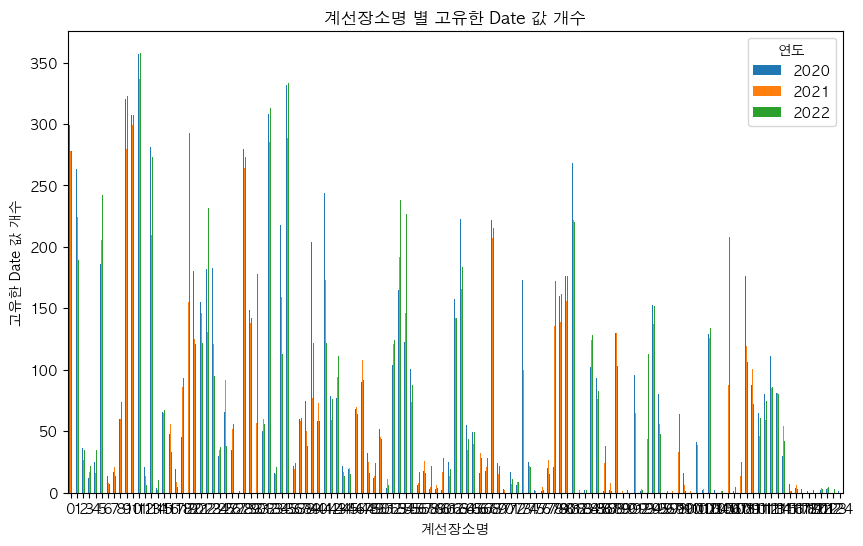

In [201]:
result_df.plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('계선장소명 별 고유한 Date 값 개수')
plt.xlabel('계선장소명')
plt.ylabel('고유한 Date 값 개수')
plt.legend(title='연도')
plt.show()

특정 시간 만큼 가용하는 선석이 정해져 있다.


In [202]:
result = pd.melt(result_df, id_vars=['계선장소명'], var_name='ETA_Year', value_name='선석가용일')

In [203]:
result

,계선장소명,ETA_Year,선석가용일
0,장생포호안,2020,299.0
1,정박지-E1,2020,263.0
2,일반부두 07,2020,36.0
3,신항일반부두 02,2020,12.0
4,일반부두 08,2020,25.0
...,...,...,...
370,남화부두,2022,NaN
371,S-OIL부이 01,2022,3.0
372,SK부이 02,2022,5.0
373,벙커링전용정박지-B22,2022,3.0


### 선석점유율 계산(가용시간 365 )

In [204]:
df['양적하_Time'].info()

<class 'pandas.core.series.Series'>
Int64Index: 59715 entries, 175 to 79184
Series name: 양적하_Time
Non-Null Count  Dtype 
--------------  ----- 
59713 non-null  object
dtypes: object(1)
memory usage: 933.0+ KB


In [205]:
temp = df.groupby(['계선장소명', 'ETA_Year'])[['양적하_Time','양적하_Time_분']].sum().reset_index()
temp

,계선장소명,ETA_Year,양적하_Time_분
0,(구)벙커링전용정박지 E1,2020,435784.0
1,(구)벙커링전용정박지 E1,2021,201295.0
2,(구)벙커링전용정박지 E2,2020,324224.0
3,(구)벙커링전용정박지 E2,2021,150513.0
4,(구)벙커링전용정박지 E3,2020,126756.0
...,...,...,...
329,화암부두 06,2020,1680.0
330,화암부두 06,2021,1367.0
331,효성부두,2020,130304.0
332,효성부두,2021,52770287.0


In [206]:
# print(24*60*365)

In [207]:
temp['점유율(365)'] = temp['양적하_Time_분'] / 525600

In [208]:
temp['점유율(365)'].mean()

3.4989457386596667

In [209]:
temp[temp['양적하_Time_분'] >= 525600]

,계선장소명,ETA_Year,양적하_Time_분,점유율(365)
37,6부두 02,2022,10525093.0,20.024911
71,S-OIL1부두,2020,802385.0,1.526608
72,S-OIL1부두,2021,5442130.0,10.354129
73,S-OIL1부두,2022,782428.0,1.488638
74,S-OIL2부두,2020,1831777.0,3.485116
75,S-OIL2부두,2021,1244301.0,2.367392
76,S-OIL2부두,2022,6536309.0,12.435900
91,SK1부두 12,2022,671477.0,1.277544
92,SK2부두 01,2020,1225057.0,2.330778
93,SK2부두 01,2021,7203560.0,13.705403


In [177]:
temp.sort_values(by = '점유율(365)', ascending = False).head(10)

,계선장소명,ETA_Year,양적하_Time_분,점유율(365)
37,6부두 02,2022,115997838.0,220.696039
310,정일1부두,2022,106142137.0,201.944705
247,유화1부두,2020,95587341.0,181.863282
265,자동차부두 01,2020,94896223.0,180.548369
204,신항컨테이너부두 04,2022,94820433.0,180.404172
129,UTT부두,2021,52827953.0,100.509804
355,효성부두,2021,52771332.0,100.402078
125,UTK부두,2020,43012347.0,81.834755
94,SK2부두 01,2022,29865798.0,56.822295
319,정일스톨트헤븐울산신항4부두,2022,11872798.0,22.589037


### 선석점유율 계산(개별 가용시간)

In [178]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   계선장소명       357 non-null    object 
 1   ETA_Year    357 non-null    int64  
 2   양적하_Time_분  357 non-null    float64
 3   점유율(365)    357 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 11.3+ KB


In [179]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   계선장소명     375 non-null    object 
 1   ETA_Year  375 non-null    int64  
 2   선석가용일     334 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.9+ KB


In [180]:
result['ETA_Year'] = result['ETA_Year'].astype(int)

In [181]:
df = pd.merge(temp, result, on=['계선장소명', 'ETA_Year'], how='outer')

In [187]:
df['선석가용_분'] = df['선석가용일']*24*60

In [188]:
df['점유율(개별)'] = df['양적하_Time_분'] / df['선석가용_분']

In [189]:
df.sort_values(by = ['점유율(개별)','계선장소명'], ascending = False).head(15)

,계선장소명,ETA_Year,양적하_Time_분,점유율(365),선석가용일,점유율(개별),선석가용_분
37,6부두 02,2022,115997838.0,220.696039,11.0,7323.095833,15840.0
265,자동차부두 01,2020,94896223.0,180.548369,24.0,2745.839786,34560.0
204,신항컨테이너부두 04,2022,94820433.0,180.404172,122.0,539.733794,175680.0
247,유화1부두,2020,95587341.0,181.863282,176.0,377.159647,253440.0
129,UTT부두,2021,52827953.0,100.509804,126.0,291.159353,181440.0
310,정일1부두,2022,106142137.0,201.944705,273.0,269.999331,393120.0
323,정일컨부두,2020,386597.0,0.735535,1.0,268.470139,1440.0
355,효성부두,2021,52771332.0,100.402078,146.0,251.005194,210240.0
58,9부두 01,2022,5957108.0,11.333919,17.0,243.345915,24480.0
85,S-OIL부이 02,2022,299538.0,0.569897,1.0,208.012500,1440.0


In [163]:
df[df['점유율(개별)'] >= 1]

,계선장소명,ETA_Year,양적하_Time_분,Service_Time_분,접안_대기시간_분,점유율(365),대기율,선석가용일,점유율(개별)
0,(구)벙커링전용정박지 E1,2020,435784.0,624412.0,104716.0,0.829117,0.240293,173.0,1.749294
1,(구)벙커링전용정박지 E1,2021,201295.0,367723.0,152917.0,0.382981,0.759666,100.0,1.397882
2,(구)벙커링전용정박지 E2,2020,324224.0,637602.0,64030.0,0.616865,0.197487,96.0,2.345370
3,(구)벙커링전용정박지 E2,2021,150513.0,267255.0,54404.0,0.286364,0.361457,65.0,1.608045
4,(구)벙커링전용정박지 E3,2020,126756.0,247252.0,66594.0,0.241164,0.525372,41.0,2.146951
...,...,...,...,...,...,...,...,...,...
309,한진신항부두,2021,26110.0,172276.0,20782.0,0.049677,0.795940,14.0,1.295139
320,현대미포의장안벽 05,2022,3050.0,16400.0,0.0,0.005803,0.000000,1.0,2.118056
322,현대오일터미널신항부두,2021,3598562.0,1648962.0,95036.0,6.846579,0.026409,299.0,8.357864
323,현대오일터미널신항부두,2022,487432.0,1147846.0,146105.0,0.927382,0.299744,307.0,1.102588


### 추가 지표
- 선석점유율
- 선박대기율
- 연간 처리량 : 선박별 하역량의 합(부재) >> 총재화톤수 합
- 연간 접안 척수 : 하역 처리 선박 수 합
- 선박당 평균 서비스 시간 : 입항선박접안시간(합)/처리접안척수
- 선박당 평균 대기 시간 : 대기선박의 대기시간 합 / 총 대기 선박

### 대기시간 예측 후 실행 선석 운영 시스템 개선 프로세스
##### 1. 비효율적인 선석 식별
대기율이 높고 점유율이 낮은 선석은 운영 효율을 개선 필요한 선석

##### 2. 대기율 높은 선석 대기시간 최소화
대기율이 높은 선석에 대해서는 우선순위를 부여 > 대기시간 최소화

##### 3. 인적/물적 자원 할당 최적화
선석의 점유율을 고려하여 자원(인적, 물적)을 최적으로 할당

##### 4. 시간대별 대기시간 패턴 파악(선석별로 보면 뭔가 다를지도)
시간대별로 대기율과 점유율을 분석하여 피크 시간대와 소요 시간을 파악하고 운영 일정을 최적화

##### 5. 문제 해결 및 개선 계획 수립
대기율이나 점유율이 높은 선석에 대해, 인프라 개선, 운영 일정 조정 등의 개선 계획을 수립

##### 6. 대기시간 예측 후 실행